In [2]:
import networkx as nx

In [58]:
def dijkstra(G,a):
    visited=set([a])
    d={}
    for i in G.nodes:
        d[i]=float('inf')
    d[a]=0
    #updating neighbors of a
    for i in list(G.neighbors(a)):
            d[i]=1
                
    while visited == G.nodes:
        v = list(set(G.neighbors(visited[-1])).difference(visited))[0]
        visited.add(v)
        
        for i in list(G.neighbors(v)):
            if d[v]+1 <d[i]:
                d[i] = d[v]+1
    return d

In [41]:
set(G.neighbors('a'))

{'b', 'c', 'd'}

In [3]:
G = nx.Graph()

In [4]:
nx.info(G) #empty

'Name: \nType: Graph\nNumber of nodes: 0\nNumber of edges: 0\n'

In [5]:
G.add_node("a")

In [6]:
G.node["a"] #like a dictionary

{}

In [7]:
G.node["a"]["name"] = "the name of the node"

In [8]:
G.node["a"]

{'name': 'the name of the node'}

In [9]:
G.add_node("b", name="This is an other node", weight = 1.5)

In [10]:
G.node["b"]

{'name': 'This is an other node', 'weight': 1.5}

In [11]:
G.nodes()

NodeView(('a', 'b'))

In [12]:
G.number_of_nodes()

2

In [13]:
G.add_edge("a","b")

In [14]:
G.edges["a","b"]["category"]="fast"  #we can use a dictionary to store informations

In [15]:
G.edges["a","b"]

{'category': 'fast'}

In [16]:
import math

In [17]:
G.add_edge("b","a", category="slow", function=math.cos)

In [18]:
G.number_of_edges() #undirected graph: just 1 edge

1

In [19]:
G.edges["a","b"]

{'category': 'slow', 'function': <function math.cos(x, /)>}

In [20]:
G.add_edge("a","c") #if c does't exist, create automatically c

In [21]:
elist = [("a","d"),("b","c"),("d","c")]

In [22]:
G.add_edges_from(elist) #an other way to add edges

In [23]:
G.number_of_edges()

5

In [24]:
G.degree("a") #number of edges by "a"

3

In [25]:
print(G.adj) #adjacency lists?

{'a': {'b': {'category': 'slow', 'function': <built-in function cos>}, 'c': {}, 'd': {}}, 'b': {'a': {'category': 'slow', 'function': <built-in function cos>}, 'c': {}}, 'c': {'a': {}, 'b': {}, 'd': {}}, 'd': {'a': {}, 'c': {}}}


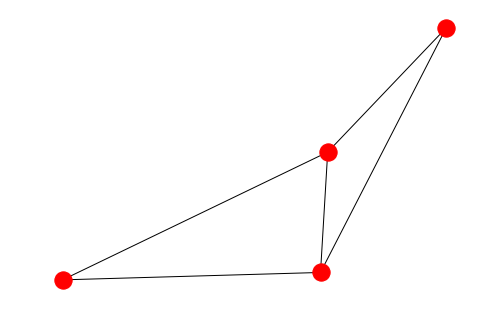

In [43]:
nx.draw(G)

In [28]:
nx.dijks

1

In [59]:
dijkstra(G,"a")

{'a': 0, 'b': 1, 'c': 1, 'd': 1}

NameError: name 'd' is not defined

## Use the airport dataset:

In [57]:
G = nx.Graph()

In [58]:
#in the file there is no the names of the columns:
columns= ["ID","name","city","country","IATA","ICAO","latitude","longitude","altitude","timezone",
         "DST","tz","type","source"]

In [59]:
import pandas as pd

In [60]:
airports =pd.read_csv("airports.dat",names=columns,index_col=0)
airports.head()

,name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,DST,tz,type,source
ID,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [64]:
for index, row in airports.iterrows():
    G.add_node(index)
    G.node[index]["id"]= index
    for attr in columns[1:]:
        G.node[index][attr] = row[attr]

In [65]:
G.number_of_nodes()

7184

In [66]:
G.node[1]

{'name': 'Goroka Airport',
 'city': 'Goroka',
 'country': 'Papua New Guinea',
 'IATA': 'GKA',
 'ICAO': 'AYGA',
 'latitude': -6.0816898345900015,
 'longitude': 145.391998291,
 'altitude': 5282,
 'timezone': '10',
 'DST': 'U',
 'tz': 'Pacific/Port_Moresby',
 'type': 'airport',
 'source': 'OurAirports',
 'id': 1}

In [45]:
columnsA= ["airline", "airline_ID","source_airport","source_airport_ID",
           "destination_airport","destination_airport_ID","codeshare","stops","equipment"]

In [46]:
routes = pd.read_csv("routes.dat", names= columnsA)

In [69]:
croutes = routes.dropna(0)

In [83]:
croutes2 =croutes.loc[croutes["source_airport_ID"] != '\\N']
croutes3 =croutes2.loc[croutes["destination_airport_ID"] != '\\N']

In [84]:
for index, row in croutes3.iterrows():
    G.add_edge(int(row["source_airport_ID"]),int(row["destination_airport_ID"]))
    for attr in columnsA:
        G.edges[int(row["source_airport_ID"]),int(row["destination_airport_ID"])][attr]=row[attr]

In [100]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8899
Number of edges: 11627
Average degree:   2.6131


In [85]:
G.node[1555]

{'name': 'Leonardo da Vinci–Fiumicino Airport',
 'city': 'Rome',
 'country': 'Italy',
 'IATA': 'FCO',
 'ICAO': 'LIRF',
 'latitude': 41.800277799999996,
 'longitude': 12.238888900000001,
 'altitude': 13,
 'timezone': '1',
 'DST': 'E',
 'tz': 'Europe/Rome',
 'type': 'airport',
 'source': 'OurAirports',
 'id': 1555}

In [86]:
G.degree(1555)

51

In [87]:
nx.dijkstra_path_length(G,1555,4048)

[1555, 3830, 4048]

In [89]:
nx.degree(G)[1555]

51

In [90]:
from matplotlib import pyplot as plt

### create a subgraph of nodes that are in Italy

In [91]:
I = G.copy()

In [95]:
for key, node in dict(nx.nodes(G)).items(): #create a new dictionary and change the value of the original dictionary
                                            #since it is no possible to iterate into a dict and change it
    if not 'country' in node.keys(): #there are nodes with no info: we drop
        I.remove_node(key)
    elif node['country'] != 'Italy':
        I.remove_node(key)

In [96]:
nx.info(I)

'Name: \nType: Graph\nNumber of nodes: 82\nNumber of edges: 23\nAverage degree:   0.5610'

In [101]:
for node in I.nodes():
    I.node[node]['pos'] = (I.node[node]['longitude'], I.node[node]['latitude'])

In [111]:
I.node[1555]['color']='green' #fiumicino

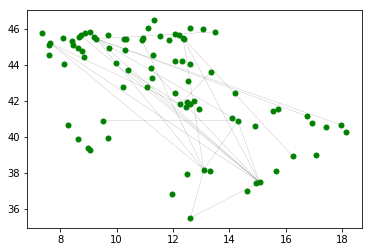

In [112]:
plt.clf()
nx.draw_networkx_nodes(I, nx.get_node_attributes(I,'pos'),
                      node_shape='.', node_size=100, 
                       node_color =[v for v in nx.get_node_attributes(I,'color').values()])
nx.draw_networkx_edges(I, nx.get_node_attributes(I,'pos'),
                      width=0.2, alpha=0.5)

plt.show()

In [109]:
[v for v in nx.get_node_attributes(I,'color').values()]

[]

In [ ]:
nx.dij